## English Wikipedia View analysis for 2008-2017

The data is obtained through an API created by the wikimedia foundation enabling us to access the traffic data for mobile-web, mobile-app and desktop respectively

### Step 1: Data acquisition
We will collect monthly data on web traffic to English Wikipedia from two Wikipedia APIs and save the data in JSON files. We will make five API calls and then save the JSON results into five separate JSON data files. We will make the API requests in python code below, but these are the complete URLs for all five API requests:


In [69]:
import requests
import json
import csv
import numpy as np
import pandas as pd
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017101000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response_pageviews_mobile_web = api_call.json()


with open('pageviews_mobile_web_201507_201709.json', 'w') as outfile:
    json.dump(response_pageviews_mobile_web, outfile)
    


In [70]:
import requests
import json
import csv
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017101000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response_pageviews_mobile_app = api_call.json()


with open('pageviews_mobile_app_201507_201709.json', 'w') as outfile:
    json.dump(response_pageviews_mobile_app, outfile)
    


In [71]:
import requests
import json
import csv
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017101000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response_pageviews_desktop = api_call.json()


with open('pageviews_desktop_201507_201709.json', 'w') as outfile:
    json.dump(response_pageviews_desktop, outfile)
    


## API for pagecounts initiated

In [72]:
import requests
import json
import csv
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'de.wikipedia.org',
            'access' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008060100',
            'end' : '2016060100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response_pagecounts_desktop = api_call.json()


with open('pagecounts_desktop_200806_201606.json', 'w') as outfile:
    json.dump(response_pagecounts_desktop, outfile)
    


In [73]:
import requests
import json
import csv
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/your_github_username', 'From' : 'your_uw_email@uw.edu'}

params = {'project' : 'de.wikipedia.org',
            'access' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016060100'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response_pagecounts_mobile = api_call.json()


with open('pagecounts_mobile_200801_201606.json', 'w') as outfile:
    json.dump(response_pagecounts_mobile, outfile)
    


### Step 2: Data processing
In this step, we perform a series of processing steps on the saved JSON data files generated by the API requests. This processing is being done to prepare the data for analysis and combine the relevant features into a single CSV-formatted data file.


In the following cells, I have converted the JSON files to csv files

In [74]:
(pd.DataFrame.from_dict(data=response_pageviews_mobile_web['items'], orient='columns').
to_csv('pageviews_mobile_web_201507_201709.csv', header=True))

In [75]:
(pd.DataFrame.from_dict(data=response_pageviews_desktop['items'], orient='columns').
to_csv('pageviews_desktop_201507_201709.csv', header=True))

In [76]:
(pd.DataFrame.from_dict(data=response_pageviews_mobile_app['items'], orient='columns').
to_csv('pageviews_mobile_app_201507_201709.csv', header=True))

In [77]:
(pd.DataFrame.from_dict(data=response_pagecounts_desktop['items'], orient='columns').
to_csv('pagecounts_desktop_200801_201606.csv', header=True))

In [78]:
(pd.DataFrame.from_dict(data=response_pagecounts_mobile['items'], orient='columns').
to_csv('pagecounts_mobile_200801_201606.csv', header=True))

### Giving names based on acronyms of the type of data.     
Naming convention:    
pvmw = pageview mobile-web  
  pvma = pageview mobile app  
pcd = pagecount desktop  
pcm = pagecount mobile

In [79]:
pvmw = pd.read_csv('pageviews_mobile_web_201507_201709.csv')

In [80]:
# To remove extra column since on doing read_csv, the column 'Unnamed: 0' is automatically added to the dataframe
del pvmw['Unnamed: 0']

In [81]:
pvma = pd.read_csv('pageviews_mobile_app_201507_201709.csv')

In [82]:
del pvma['Unnamed: 0']

In [83]:
pcd = pd.read_csv('pagecounts_desktop_200801_201606.csv')

In [84]:
del pcd['Unnamed: 0']

In [85]:
pcm = pd.read_csv('pagecounts_mobile_200801_201606.csv')

In [86]:
del pcm['Unnamed: 0']

In [87]:
pvd = pd.read_csv('pageviews_desktop_201507_201709.csv')

In [88]:
del pvd['Unnamed: 0']

### Filling the dataframe with values of page views and counts

To separate year and month for each csv file, created a function to do that.

In [89]:
def change_csv(df):
    df_time = df['timestamp'].values.tolist()
    df_time = [str(x) for x in df_time]
    df_year=[]
    for i in range(0,len(df_time)):
        df_year.append(df_time[i][0:4])
    df['year'] = df_year
    df_month = []
    for i in range(0,len(df_time)):
        df_month.append(df_time[i][4:6])
    df['month'] = df_month
    del df['timestamp']
    return df

Changed all dataframes to dfs with year and month separated

In [90]:
pcm = change_csv(pcm)

In [91]:
pcd = change_csv(pcd)

In [92]:
pvmw = change_csv(pvmw)

In [93]:
pvma = change_csv(pvma)

In [94]:
pvd = change_csv(pvd)

Dropping any unnecessary columns to avoid too many columns in the intermediate dataframes while merging

### Making final dataframe

In [95]:
#Merging pagecount mobile and pagecount desktop and replacing Nan values with 0
pc = pcm.merge(pcd, on=['year','month'],how='outer')

pc= pc.fillna(0)



In [96]:
# To calculate total views
pc["pagecount_all_views"] = pc['count_y'] + pc['count_x']

#Merging pageview mobile and pageview desktop and replacing Nan values with 0
mo = pvmw.merge(pvma,on=['year','month'],how='outer')

mo["pageview_mobile_views"] = mo["views_x"] + mo["views_y"]  


In [97]:
pv = mo.merge(pvd, how='outer',on=["year", "month"])

pv = pv.fillna(0)


In [98]:
#To get total views
pv["pageview_all_views"] =  pv["pageview_mobile_views"] + pv["views_x"]

mo.drop(["views_x", "views_y"],axis=1,inplace=True)

#Combining both pagecount and pageview dataframes to make the final dataframe
final = pc.merge(pv, how='outer',on=["year", "month"])

final = final[["year", "month", "pagecount_all_views","count_y", "count_x","pageview_all_views", "views",
"pageview_mobile_views"]]

final = final.fillna(0)

final.to_csv('en_wikipedia_traffic_200801_201709 .csv')

## Analysis

In this part, I have plotted the timeseries graph using matplotlib

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [100]:
#Creating a date range for the x-axis
daterange = pd.date_range('2008-01', '2017-05',freq='M')

In [101]:
x = daterange


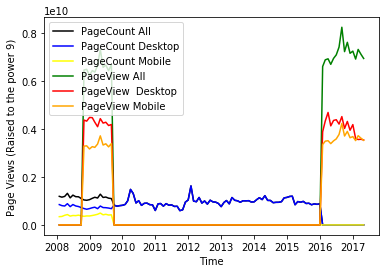

In [102]:


pc1 = final["pagecount_all_views"]
pc2 = final["count_y"]
pc3 = final["count_x"]
pv1 = final["pageview_all_views"]
pv2 = final["views"]
pv3 = final["pageview_mobile_views"]





%matplotlib inline


plt.plot(x, pc1, label = "PageCount All", color = "black")
plt.plot(x, pc2, label = "PageCount Desktop", color = "blue")
plt.plot(x, pc3, label = "PageCount Mobile", color = "yellow")
plt.plot(x, pv1, label = "PageView All", color = "green")
plt.plot(x, pv2, label = "PageView  Desktop", color = "red")
plt.plot(x, pv3, label = "PageView Mobile", color = "orange")

plt.legend(loc=2)
plt.xlabel("Time")
plt.ylabel("Page Views (Raised to the power 9)")



plt.show()




In [103]:
fig.savefig("Plot.png")